# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [46]:
import math
import random
import pandas as pd
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
temp = pd.read_csv("./Temp_States.csv")

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [10]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

We have type objects in the columns City and State, because every value is an string inside them. The Temperature column has float values inside them to show the temperature of each city. 

#### Select the rows where state is New York

In [12]:
ny = temp[temp["State"] == "New York"]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [14]:
ny_mean = ny["Temperature"].mean()
ny_mean

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [16]:
city_state = temp[temp["Temperature"] > 15]
city_state

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
temp.loc[temp["Temperature"] > 15, "City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [34]:
temp.City[(temp["Temperature"] > 15) & (temp["Temperature"]< 20)]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [35]:
temp.groupby("State")["Temperature"].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [36]:
temp.groupby("State")["Temperature"].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [41]:
employee = pd.read_csv("./Employee.csv")

In [45]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [44]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

The first five columns are type objects which contain information about every people. The last ones are integers which explain the years worked and their salaries.  

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Years', ylabel='Count'>

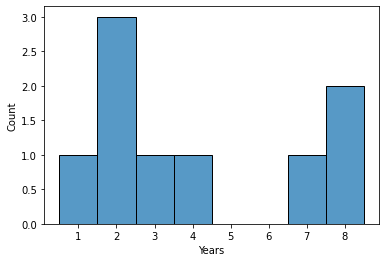

In [64]:
sns.histplot(employee.Years, discrete = True)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

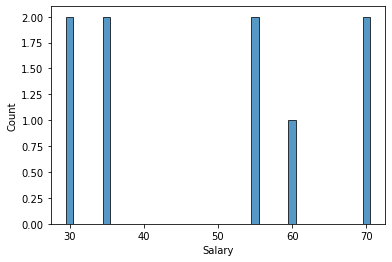

In [65]:
sns.histplot(employee.Salary, discrete = True)

#### What's the average salary in this company?

In [48]:
salary_mean = employee["Salary"].mean()
salary_mean

48.888888888888886

#### What's the highest salary?

In [50]:
salary_max = employee["Salary"].max()
salary_max

70

#### What's the lowest salary?

In [51]:
salary_min = employee["Salary"].min()
salary_min

30

#### Who are the employees with the lowest salary?

In [53]:
lowest = employee[employee["Salary"] == 30]
lowest

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [54]:
david = employee[employee["Name"] == "David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [57]:
david_wage = david["Salary"]
david_wage

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [59]:
associate = employee[employee["Title"] == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [60]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [63]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [68]:
employee.Name[(employee["Title"] ==  "associate") & (employee["Salary"] > 55)]

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [69]:
employee.groupby("Years")["Salary"].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [70]:
employee.groupby("Title")["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

/home/pablofdez/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary'>

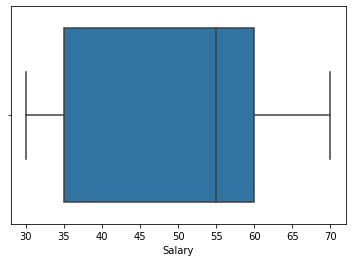

In [71]:
sns.boxplot(employee.Salary)

In [73]:
employee.Salary.quantile(0.25)

35.0

In [74]:
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [80]:
employee.groupby("Gender")["Salary"].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [82]:
employee.Department.unique()

array(['IT', 'HR', 'Sales'], dtype=object)

In [85]:
employee.groupby("Department")[("Salary", "Years")].mean()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [91]:
orders = pd.read_csv("./Orders.zip")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [96]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [93]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [95]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [98]:
orders["UnitPrice"].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [99]:
orders["UnitPrice"].max()

8142.75

In [100]:
orders["UnitPrice"].min()

0.0

#### Select all the customers we have in Spain

In [103]:
españita = orders[orders["Country"] == "Spain"]
españita.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [111]:
españita.CustomerID.nunique()

30

#### Select all the customers who have bought more than 50 items ?

In [149]:
#FALTA
buyers = orders[orders["Quantity"] > 50]
buyers

#### Select orders from Spain that are above 50 items

In [143]:
compradores = españita[españita["Quantity"] > 50]
compradores.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [120]:
free = orders[orders["amount_spent"] == 0]
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [158]:
orders_lunch_bag = orders[orders["Description"].str.contains("lunch bag")]
orders_lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [160]:
orders_2011 = orders_lunch_bag[orders_lunch_bag["year"] == 2011]
orders_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

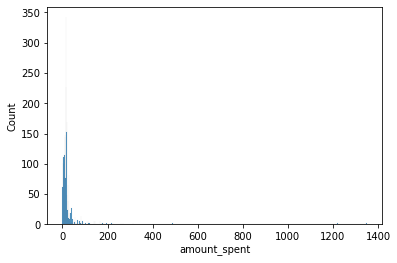

In [175]:
#FALTA RESIZE

sns.histplot(españita.amount_spent)

#### Select all orders made in the month of August

In [161]:
august = orders[orders["month"] == 8]
august.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [166]:
recount = august.groupby("Country")["InvoiceNo"].count()
recount

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [168]:
by_country = orders.groupby("Country")["amount_spent"].mean()
by_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [181]:
#FALTA

most_expensive = orders.loc[orders.groupby("Description")["UnitPrice"].idxmax()]
most_expensive

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
1046,1057,536522,72800B,2010,12,3,12,4 purple flock dinner candles,2,2010-12-01 12:49:00,2.55,15012,United Kingdom,5.10
219123,309257,564065,23437,2011,8,1,15,50's christmas gift bag large,12,2011-08-22 15:05:00,1.25,15150,United Kingdom,15.00
193216,276962,561081,23345,2011,7,7,16,dolly girl beaker,1,2011-07-24 16:15:00,1.25,13230,United Kingdom,1.25
236668,334343,566240,23391,2011,9,7,11,i love london mini backpack,1,2011-09-11 11:29:00,4.15,14508,United Kingdom,4.15
273967,379954,569720,23391,2011,10,4,9,i love london mini rucksack,1,2011-10-06 09:11:00,4.15,14646,Netherlands,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344398,467283,576339,23144,2011,11,1,15,zinc t-light holder stars small,1,2011-11-14 15:27:00,1.63,14096,United Kingdom,1.63
12029,18242,537809,21275,2010,12,3,13,zinc top 2 door wooden shelf,1,2010-12-08 13:28:00,16.95,14217,United Kingdom,16.95
250971,350911,567656,84832,2011,9,3,14,zinc willie winkie candle stick,1,2011-09-21 14:40:00,1.63,14096,United Kingdom,1.63
119295,174627,551835,23143,2011,5,3,13,zinc wire kitchen organiser,2,2011-05-04 13:17:00,10.40,17646,United Kingdom,20.80


#### What was the average amount spent per year ?

In [174]:
per_year = orders.groupby("year")["amount_spent"].mean()
per_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64